In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# <font color = blue> Bike Sharing Demand Analysis </font>
The goal of this assignment is to create a linear regression model that predicts demand for shared bike which can then be used by the management to formulate a strategy to meet demand levels based on various factors and meet the customer's expectations.

## Task 1: Data Reading

In [4]:
# Loading the Dataset and checking it's contents and checking the data quality. I have moved the file into my working directory. Using set_option to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('day.csv')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [5]:
# Checking Shape
df.shape

(730, 16)

In [6]:
# Checking if instant column has unique entries, if yes, then will convert it to index
df['instant'].nunique()

730

In [7]:
# Setting the instant column as index to number of columns
df.set_index('instant', inplace=True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [9]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Since the Model is to be built for cnt column, casual and registed are redundant here. It should not be used to build the model, thus dropping these two columns before further processing

In [10]:
df.drop(['casual', 'registered'], inplace=True, axis = 1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Converting the dteday to Date Time
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'].dtypes

dtype('<M8[ns]')

In [12]:
# Changing the month number to month abbr for better view
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [13]:
# Since season, weekday and weathesit are basically categorical values, converting them to string type for future use
df[['season','weekday','weathersit']] = df[['season','weekday','weathersit']].astype(str)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 79.8+ KB


In [15]:
# Checking the % of null values in each column
round(df.isnull().sum()/len(df.index)*100,2)

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

There are no Null values!

In [16]:
# Converting the weather variable into more understanable text
df['weathersit'].replace(['1','2','3','4'],['Good', 'Average', 'Bad', 'Very Bad'], inplace=True)

In [17]:
# Converting the seasons into specific season names for better understanding
df['season'].replace(['1','2','3','4'],['spring', 'summer', 'fall', 'winter'], inplace=True)

## Visualizing the data

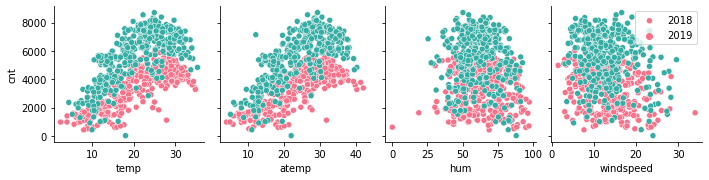

In [69]:
# Checking linear relationship between the cnt variable and other numeric variables
x = sns.pairplot(df, palette='husl', x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , hue='yr', diag_kind = None)
x._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

We can see that there is some corelation between Feeling Temperature and sales. Also the count in 2019 are much higher than the count in 2018 for all circumstances.

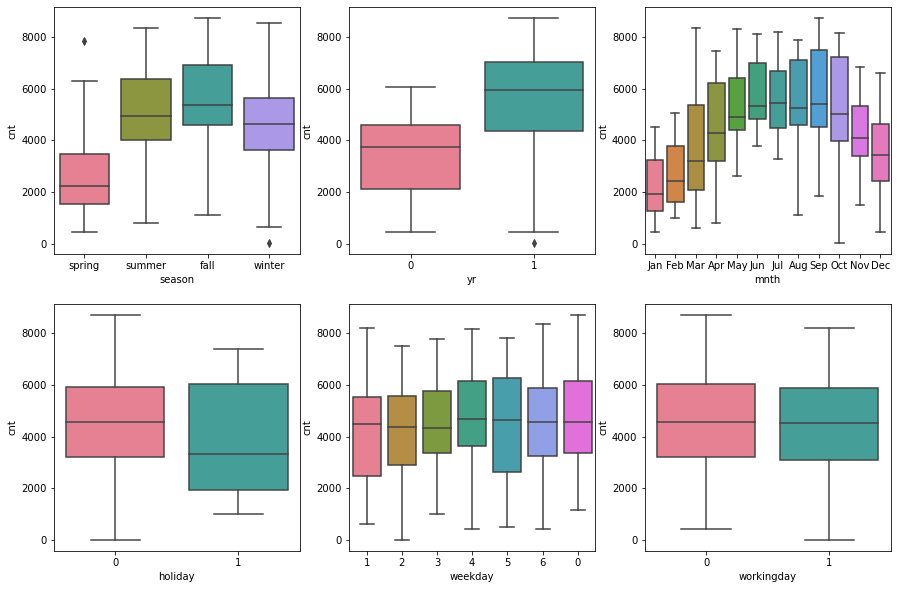

In [19]:
# Checking the distribution of rentals across different categorical variables
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df, palette='husl')
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=df, palette='husl')
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=df, palette='husl')
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=df, palette='husl')
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=df, palette='husl')
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df, palette='husl')

plt.show()

It seems that during the summer months, the registration count picks up

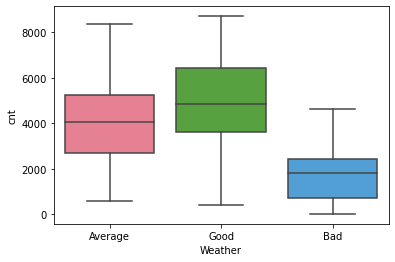

In [20]:
sns.boxplot(x='weathersit', y='cnt', data=df, palette='husl')
plt.xlabel('Weather')
plt.show()

Count picks up in Good Weather days

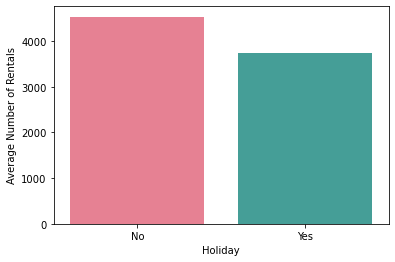

In [21]:
# Checking business on Holidays
holiday_df = df.groupby(['holiday'])['cnt'].mean().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_df, palette='husl')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Holiday')
plt.ylabel('Average Number of Rentals')
plt.show()

Non Holidays have slight higher average rentals

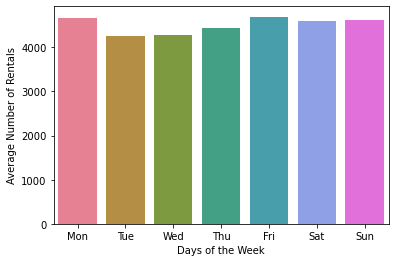

In [22]:
# Total rentals on different days of the week.
weekday_df = df.groupby(['weekday'])['cnt'].mean().reset_index()
sns.barplot(x='weekday', y='cnt', data=weekday_df, palette='husl')
plt.xticks(np.arange(7),('Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun'))
plt.xlabel('Days of the Week')
plt.ylabel('Average Number of Rentals')
plt.show()

Rentals are uniform throuout the week but there is a small uptrend as weekend appraches

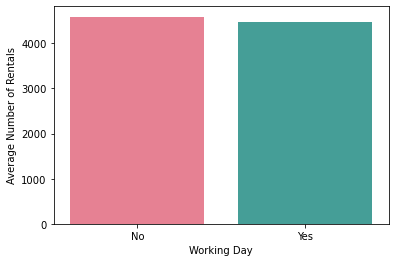

In [23]:
# Checking business on Workingdays
workingday_df = df.groupby(['workingday'])['cnt'].mean().reset_index()
sns.barplot(x='workingday', y='cnt', data=workingday_df, palette='husl')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Working Day')
plt.ylabel('Average Number of Rentals')
plt.show()

## Creating Dummy Variables for Categorical Data

### We need to create dummy variables for the following columns.
        season
        mnth
        weekday
        weathersit

In [24]:
dummy = pd.get_dummies(df[['season','mnth','weekday','weathersit']], drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [25]:
df = pd.concat([df,dummy], axis=1)   #Axis=1 is for horizontal stacking
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [26]:
print('Shape of the new dataframe is:' , df.shape)

Shape of the new dataframe is: (730, 31)


In [27]:
# Since we have the month and the Year in two seperate columns, we do not need the date column anymore, thus dropping it
df.drop('dteday', inplace=True, axis = 1)

In [28]:
# Moving the cnt to the end for easier identification
first_col = df.pop('cnt')
df['cnt'] = first_col

## Splitting the data into Train and Test Dataset

In [29]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size = 0.3, random_state=100)

In [30]:
print('Shape of the Train data is:' , df_train.shape)
print('Shape of the Test data is:' , df_test.shape)

Shape of the Train data is: (510, 30)
Shape of the Test data is: (219, 30)


In [31]:
# Checking the Train Data
pd.set_option('display.max_columns', None)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good,cnt
instant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,7534
577,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,7216
427,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4066
729,1,0,1,10.489153,11.5850,48.3333,23.500518,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1796
483,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4220


Other than the numeric fields, all other categorical values have been encoded. Now we can go ahead and scale the data.

## Feature Scaling

In [32]:
# We do a MinMax scaling
scaler = MinMaxScaler()    #Instantiating the object
cols = df_train.columns
df_train[cols] = scaler.fit_transform(df_train[cols])

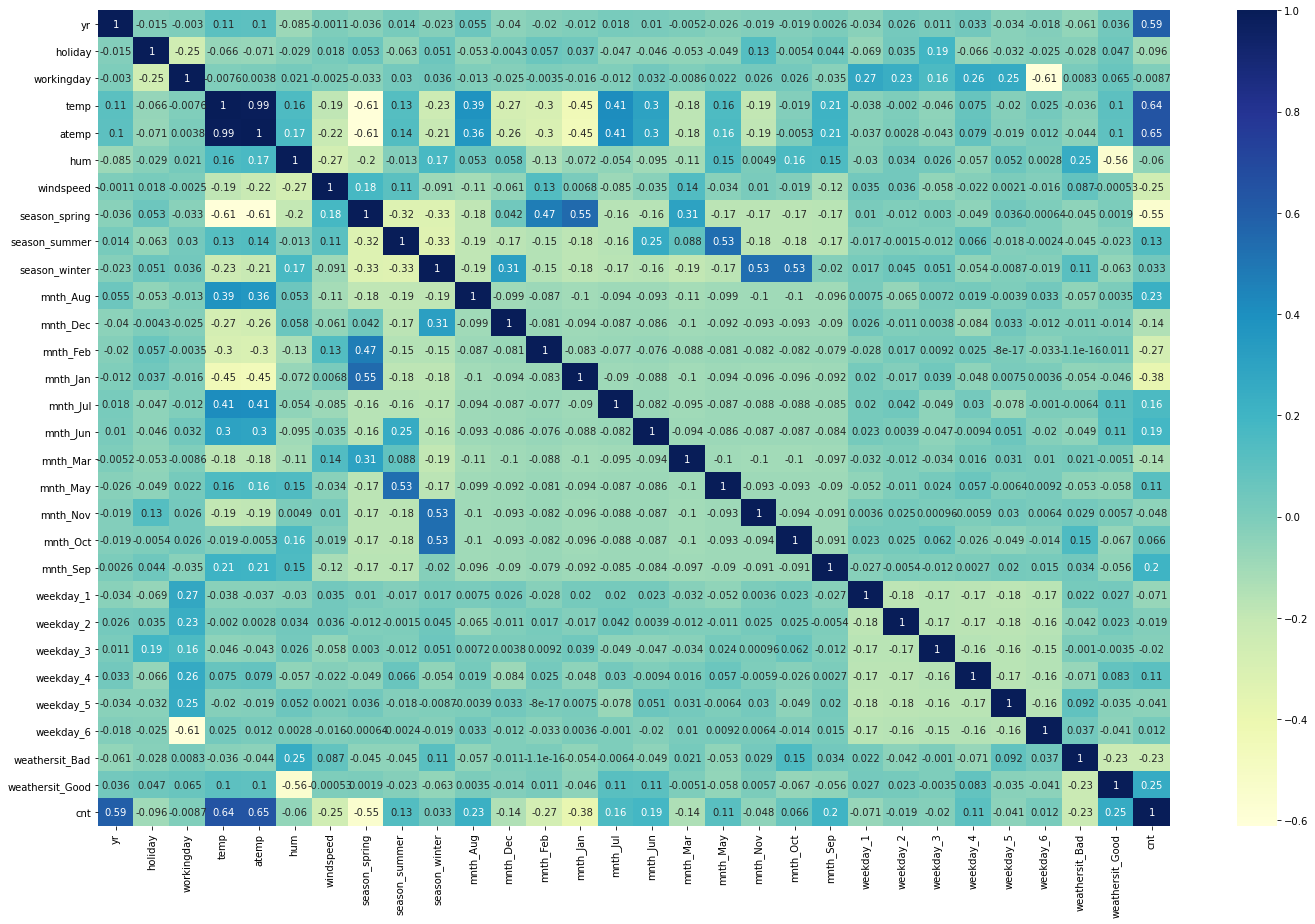

In [33]:
# Checking the Heatmap
plt.figure(figsize=(24,15))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

cnt has strong colinearity with yr, temp, atemp.
But, temp and atemp have almost a perfect colinearity, so both cannot be part of the model. We keep this in mind while building the model in the following cells.

## Building the Model

Since the number of columns is 29, which is manageable, we first build a model with all the columns, and then keep removing the columns based upon Statistical Significance and Co-Linearity.
We will stop when we notice that there is no further improvement in the R2 value or all variables are statistically significant with low VIF.

There wil be several iterations before getting the perfect model

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          4.09e-178
Time:                        13:10:45   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     480   BIC:                            -860.7
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2851      0.047      6.059      0.000       0.193       0.378
yr                  0.2309      0.008     28.359      0.000       0.215       0.247
holiday            -0.1352      0.065     -2.068      0.039      -0.264      -0.007
workingday         -0.0609      0.071     -0.856      0.392      -0.201       0.079
temp                0.4003      0.143      2.790      0.005       0.118       0.682
atemp               0.0464      0.139      0.333      0.739      -0.227       0.320
hum                -0.1578      0.039     -4.054      0.000      -0.234      -0.081
windspeed          -0.1811      0.027     -6.793      0.000      -0.234      -0.129
season_spring      -0.0441      0.030     -1.455      0.146      -0.104       0.015
season_summer       0.0418      0.027      1.575      0.116      -0.010       0.094
season_winter       0.1105      0.028      3.915      0.000       0.055       0.166
mnth_Aug            0.0230      0.034      0.671      0.503      -0.044       0.091
mnth_Dec           -0.0457      0.034     -1.347      0.178      -0.112       0.021
mnth_Feb           -0.0372      0.033     -1.117      0.265      -0.103       0.028
mnth_Jan           -0.0635      0.034     -1.873      0.062      -0.130       0.003
mnth_Jul           -0.0339      0.036     -0.953      0.341      -0.104       0.036
mnth_Jun            0.0021      0.026      0.084      0.933      -0.048       0.052
mnth_Mar            0.0008      0.025      0.032      0.974      -0.048       0.050
mnth_May            0.0248      0.021      1.161      0.246      -0.017       0.067
mnth_Nov           -0.0415      0.037     -1.131      0.259      -0.114       0.031
mnth_Oct            0.0059      0.036      0.164      0.870      -0.065       0.077
mnth_Sep            0.0867      0.032      2.680      0.008       0.023       0.150
weekday_1           0.0256      0.072      0.358      0.720      -0.115       0.166
weekday_2           0.0240      0.071      0.336      0.737      -0.116       0.164
weekday_3           0.0391      0.071      0.552      0.581      -0.100       0.178
weekday_4           0.0541      0.072      0.755      0.451      -0.087       0.195
weekday_5           0.0503      0.072      0.703      0.482      -0.090       0.191
weekday_6          -0.0060      0.015     -0.389      0.698      -0.036       0.024
weathersit_Bad     -0.1916      0.025     -7.588      0.000      -0.241      -0.142
weathersit_Good     0.0593      0.011      5.627      0.000       0.039       0.080
==============================================================================
Omnibus:                       79.473   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.099
Skew:                          -0.773   Prob(JB):                     1.45

In [35]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,440.08
4,atemp,382.52
2,workingday,229.64
21,weekday_1,50.78
22,weekday_2,49.61
25,weekday_5,48.15
24,weekday_4,47.09
23,weekday_3,43.27
5,hum,34.56
7,season_spring,12.22


The R-squared is a significant 85%, but there are insignificant variables and variables with strong multicollinearity. We need to get rid of them, in the following cells, we will follow the same process in an itrative manner till we build a robust model. First we will remove all columns with High P Values and then when the P Values are acceptable for all the columns, we will check their VIF and remove them.

In [36]:
# Removing 'mnth_Mar' due to high P-Value
X = X_train.drop('mnth_Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model2 = lr.fit()
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.06
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          4.10e-179
Time:                        13:12:04   Log-Likelihood:                 523.87
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     481   BIC:                            -866.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2857      0.044      6.458      0.000       0.199       0.373
yr                  0.2309      0.008     28.388      0.000       0.215       0.247
holiday            -0.1352      0.065     -2.070      0.039      -0.264      -0.007
workingday         -0.0609      0.071     -0.857      0.392      -0.200       0.079
temp                0.4001      0.143      2.793      0.005       0.119       0.682
atemp               0.0463      0.139      0.333      0.739      -0.227       0.320
hum                -0.1577      0.039     -4.069      0.000      -0.234      -0.082
windspeed          -0.1812      0.027     -6.811      0.000      -0.233      -0.129
season_spring      -0.0438      0.029     -1.527      0.127      -0.100       0.013
season_summer       0.0416      0.026      1.600      0.110      -0.009       0.093
season_winter       0.1107      0.028      3.995      0.000       0.056       0.165
mnth_Aug            0.0227      0.032      0.700      0.484      -0.041       0.086
mnth_Dec           -0.0464      0.026     -1.768      0.078      -0.098       0.005
mnth_Feb           -0.0380      0.022     -1.689      0.092      -0.082       0.006
mnth_Jan           -0.0643      0.023     -2.851      0.005      -0.109      -0.020
mnth_Jul           -0.0343      0.034     -1.010      0.313      -0.101       0.032
mnth_Jun            0.0019      0.024      0.078      0.938      -0.046       0.050
mnth_May            0.0245      0.020      1.229      0.220      -0.015       0.064
mnth_Nov           -0.0422      0.031     -1.357      0.176      -0.103       0.019
mnth_Oct            0.0053      0.031      0.172      0.864      -0.055       0.066
mnth_Sep            0.0863      0.029      2.936      0.003       0.029       0.144
weekday_1           0.0256      0.072      0.358      0.721      -0.115       0.166
weekday_2           0.0239      0.071      0.336      0.737      -0.116       0.164
weekday_3           0.0390      0.071      0.553      0.581      -0.100       0.178
weekday_4           0.0541      0.072      0.756      0.450      -0.087       0.195
weekday_5           0.0503      0.071      0.703      0.482      -0.090       0.191
weekday_6          -0.0060      0.015     -0.390      0.697      -0.036       0.024
weathersit_Bad     -0.1916      0.025     -7.596      0.000      -0.241      -0.142
weathersit_Good     0.0593      0.011      5.634      0.000       0.039       0.080
==============================================================================
Omnibus:                       79.453   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.191
Skew:                          -0.772   Prob(JB):                     1.38e-46
Kurtosis:                       5.748   Cond. No.                         96.4


In [37]:
# Removing 'mnth_Jun' due to high P-Value
X = X.drop('mnth_Jun',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model5 = lr.fit()
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          4.03e-180
Time:                        13:13:43   Log-Likelihood:                 523.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2860      0.044      6.500      0.000       0.200       0.372
yr                  0.2309      0.008     28.562      0.000       0.215       0.247
holiday            -0.1352      0.065     -2.071      0.039      -0.263      -0.007
workingday         -0.0607      0.071     -0.856      0.392      -0.200       0.079
temp                0.4035      0.137      2.955      0.003       0.135       0.672
atemp               0.0448      0.138      0.326      0.745      -0.226       0.315
hum                -0.1580      0.039     -4.102      0.000      -0.234      -0.082
windspeed          -0.1814      0.026     -6.881      0.000      -0.233      -0.130
season_spring      -0.0445      0.027     -1.632      0.103      -0.098       0.009
season_summer       0.0411      0.025      1.633      0.103      -0.008       0.091
season_winter       0.1103      0.027      4.050      0.000       0.057       0.164
mnth_Aug            0.0211      0.025      0.838      0.403      -0.028       0.071
mnth_Dec           -0.0465      0.026     -1.781      0.076      -0.098       0.005
mnth_Feb           -0.0378      0.022     -1.691      0.092      -0.082       0.006
mnth_Jan           -0.0640      0.022     -2.877      0.004      -0.108      -0.020
mnth_Jul           -0.0359      0.026     -1.380      0.168      -0.087       0.015
mnth_May            0.0238      0.018      1.356      0.176      -0.011       0.058
mnth_Nov           -0.0425      0.031     -1.385      0.167      -0.103       0.018
mnth_Oct            0.0047      0.030      0.158      0.875      -0.054       0.064
mnth_Sep            0.0850      0.025      3.455      0.001       0.037       0.133
weekday_1           0.0255      0.071      0.357      0.721      -0.115       0.166
weekday_2           0.0238      0.071      0.335      0.738      -0.116       0.163
weekday_3           0.0389      0.071      0.551      0.582      -0.100       0.177
weekday_4           0.0539      0.072      0.754      0.451      -0.087       0.194
weekday_5           0.0501      0.071      0.702      0.483      -0.090       0.190
weekday_6          -0.0060      0.015     -0.392      0.696      -0.036       0.024
weathersit_Bad     -0.1916      0.025     -7.605      0.000      -0.241      -0.142
weathersit_Good     0.0593      0.011      5.640      0.000       0.039       0.080
==============================================================================
Omnibus:                       79.271   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.942
Skew:                          -0.772   Prob(JB):                     2.58e-46
Kurtosis:                       5.738   Cond. No.                         93.8
==============================================================================

Note

In [38]:
# Removing 'mnth_Oct' due to high P-Value
X = X.drop('mnth_Oct',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model4 = lr.fit()
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     106.0
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          3.92e-181
Time:                        13:14:07   Log-Likelihood:                 523.85
No. Observations:                 510   AIC:                            -993.7
Df Residuals:                     483   BIC:                            -879.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2870      0.043      6.603      0.000       0.202       0.372
yr                  0.2308      0.008     28.594      0.000       0.215       0.247
holiday            -0.1352      0.065     -2.073      0.039      -0.263      -0.007
workingday         -0.0611      0.071     -0.863      0.389      -0.200       0.078
temp                0.4022      0.136      2.954      0.003       0.135       0.670
atemp               0.0456      0.137      0.332      0.740      -0.224       0.316
hum                -0.1572      0.038     -4.118      0.000      -0.232      -0.082
windspeed          -0.1811      0.026     -6.894      0.000      -0.233      -0.130
season_spring      -0.0451      0.027     -1.674      0.095      -0.098       0.008
season_summer       0.0397      0.024      1.683      0.093      -0.007       0.086
season_winter       0.1126      0.023      4.895      0.000       0.067       0.158
mnth_Aug            0.0199      0.024      0.830      0.407      -0.027       0.067
mnth_Dec           -0.0495      0.018     -2.697      0.007      -0.086      -0.013
mnth_Feb           -0.0387      0.022     -1.791      0.074      -0.081       0.004
mnth_Jan           -0.0649      0.021     -3.029      0.003      -0.107      -0.023
mnth_Jul           -0.0371      0.025     -1.490      0.137      -0.086       0.012
mnth_May            0.0238      0.018      1.358      0.175      -0.011       0.058
mnth_Nov           -0.0463      0.019     -2.421      0.016      -0.084      -0.009
mnth_Sep            0.0832      0.022      3.850      0.000       0.041       0.126
weekday_1           0.0260      0.071      0.364      0.716      -0.114       0.166
weekday_2           0.0241      0.071      0.340      0.734      -0.115       0.164
weekday_3           0.0393      0.070      0.558      0.577      -0.099       0.178
weekday_4           0.0543      0.071      0.761      0.447      -0.086       0.195
weekday_5           0.0505      0.071      0.708      0.479      -0.090       0.191
weekday_6          -0.0060      0.015     -0.388      0.698      -0.036       0.024
weathersit_Bad     -0.1914      0.025     -7.613      0.000      -0.241      -0.142
weathersit_Good     0.0594      0.010      5.657      0.000       0.039       0.080
==============================================================================
Omnibus:                       78.807   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.921
Skew:                          -0.769   Prob(JB):                     7.09e-46
Kurtosis:                       5.724   Cond. No.                         93.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [39]:
# Removing 'weekday_2' due to high P-Value
X = X.drop('weekday_2',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model10 = lr.fit()
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          3.91e-182
Time:                        13:15:48   Log-Likelihood:                 523.79
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     484   BIC:                            -885.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2866      0.043      6.602      0.000       0.201       0.372
yr                  0.2310      0.008     28.699      0.000       0.215       0.247
holiday            -0.1152      0.029     -4.040      0.000      -0.171      -0.059
workingday         -0.0375      0.015     -2.541      0.011      -0.067      -0.009
temp                0.4028      0.136      2.962      0.003       0.136       0.670
atemp               0.0453      0.137      0.330      0.742      -0.225       0.315
hum                -0.1565      0.038     -4.110      0.000      -0.231      -0.082
windspeed          -0.1813      0.026     -6.908      0.000      -0.233      -0.130
season_spring      -0.0449      0.027     -1.669      0.096      -0.098       0.008
season_summer       0.0398      0.024      1.688      0.092      -0.007       0.086
season_winter       0.1125      0.023      4.898      0.000       0.067       0.158
mnth_Aug            0.0197      0.024      0.824      0.410      -0.027       0.067
mnth_Dec           -0.0494      0.018     -2.695      0.007      -0.085      -0.013
mnth_Feb           -0.0385      0.022     -1.785      0.075      -0.081       0.004
mnth_Jan           -0.0648      0.021     -3.028      0.003      -0.107      -0.023
mnth_Jul           -0.0372      0.025     -1.495      0.136      -0.086       0.012
mnth_May            0.0236      0.017      1.350      0.178      -0.011       0.058
mnth_Nov           -0.0469      0.019     -2.468      0.014      -0.084      -0.010
mnth_Sep            0.0832      0.022      3.857      0.000       0.041       0.126
weekday_1           0.0022      0.014      0.154      0.878      -0.026       0.030
weekday_3           0.0159      0.015      1.073      0.284      -0.013       0.045
weekday_4           0.0306      0.015      2.092      0.037       0.002       0.059
weekday_5           0.0268      0.015      1.836      0.067      -0.002       0.055
weekday_6          -0.0065      0.015     -0.425      0.671      -0.037       0.024
weathersit_Bad     -0.1915      0.025     -7.621      0.000      -0.241      -0.142
weathersit_Good     0.0594      0.010      5.663      0.000       0.039       0.080
==============================================================================
Omnibus:                       78.753   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.926
Skew:                          -0.771   Prob(JB):                     1.92e-45
Kurtosis:                       5.704   Cond. No.                         93.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Removing 'weekday_1' due to high P-Value
X = X.drop('weekday_1',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          3.64e-183
Time:                        13:17:13   Log-Likelihood:                 523.78
No. Observations:                 510   AIC:                            -997.6
Df Residuals:                     485   BIC:                            -891.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2869      0.043      6.621      0.000       0.202       0.372
yr                  0.2310      0.008     28.740      0.000       0.215       0.247
holiday            -0.1146      0.028     -4.069      0.000      -0.170      -0.059
workingday         -0.0364      0.013     -2.825      0.005      -0.062      -0.011
temp                0.4029      0.136      2.965      0.003       0.136       0.670
atemp               0.0451      0.137      0.329      0.742      -0.224       0.315
hum                -0.1568      0.038     -4.127      0.000      -0.232      -0.082
windspeed          -0.1814      0.026     -6.920      0.000      -0.233      -0.130
season_spring      -0.0449      0.027     -1.670      0.096      -0.098       0.008
season_summer       0.0398      0.024      1.691      0.092      -0.006       0.086
season_winter       0.1125      0.023      4.901      0.000       0.067       0.158
mnth_Aug            0.0198      0.024      0.831      0.406      -0.027       0.067
mnth_Dec           -0.0493      0.018     -2.694      0.007      -0.085      -0.013
mnth_Feb           -0.0386      0.022     -1.792      0.074      -0.081       0.004
mnth_Jan           -0.0648      0.021     -3.030      0.003      -0.107      -0.023
mnth_Jul           -0.0372      0.025     -1.496      0.135      -0.086       0.012
mnth_May            0.0236      0.017      1.350      0.178      -0.011       0.058
mnth_Nov           -0.0470      0.019     -2.471      0.014      -0.084      -0.010
mnth_Sep            0.0833      0.022      3.863      0.000       0.041       0.126
weekday_3           0.0148      0.013      1.134      0.257      -0.011       0.040
weekday_4           0.0295      0.013      2.315      0.021       0.004       0.054
weekday_5           0.0256      0.013      2.029      0.043       0.001       0.050
weekday_6          -0.0065      0.015     -0.427      0.670      -0.037       0.023
weathersit_Bad     -0.1913      0.025     -7.632      0.000      -0.241      -0.142
weathersit_Good     0.0593      0.010      5.667      0.000       0.039       0.080
==============================================================================
Omnibus:                       78.598   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.062
Skew:                          -0.769   Prob(JB):                     1.80e-45
Kurtosis:                       5.708   Cond. No.                         92.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Removing 'weekday_6' due to high P-Value
X = X.drop('weekday_6',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     120.5
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          3.59e-184
Time:                        13:18:18   Log-Likelihood:                 523.68
No. Observations:                 510   AIC:                            -999.4
Df Residuals:                     486   BIC:                            -897.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2841      0.043      6.637      0.000       0.200       0.368
yr                  0.2311      0.008     28.791      0.000       0.215       0.247
holiday            -0.1118      0.027     -4.081      0.000      -0.166      -0.058
workingday         -0.0333      0.011     -3.145      0.002      -0.054      -0.012
temp                0.3989      0.135      2.945      0.003       0.133       0.665
atemp               0.0490      0.137      0.358      0.720      -0.220       0.318
hum                -0.1569      0.038     -4.132      0.000      -0.232      -0.082
windspeed          -0.1810      0.026     -6.915      0.000      -0.232      -0.130
season_spring      -0.0453      0.027     -1.689      0.092      -0.098       0.007
season_summer       0.0395      0.024      1.680      0.094      -0.007       0.086
season_winter       0.1122      0.023      4.896      0.000       0.067       0.157
mnth_Aug            0.0196      0.024      0.823      0.411      -0.027       0.066
mnth_Dec           -0.0492      0.018     -2.690      0.007      -0.085      -0.013
mnth_Feb           -0.0384      0.022     -1.784      0.075      -0.081       0.004
mnth_Jan           -0.0648      0.021     -3.033      0.003      -0.107      -0.023
mnth_Jul           -0.0372      0.025     -1.497      0.135      -0.086       0.012
mnth_May            0.0235      0.017      1.347      0.179      -0.011       0.058
mnth_Nov           -0.0474      0.019     -2.501      0.013      -0.085      -0.010
mnth_Sep            0.0831      0.022      3.859      0.000       0.041       0.125
weekday_3           0.0149      0.013      1.142      0.254      -0.011       0.040
weekday_4           0.0295      0.013      2.319      0.021       0.005       0.054
weekday_5           0.0257      0.013      2.037      0.042       0.001       0.051
weathersit_Bad     -0.1918      0.025     -7.670      0.000      -0.241      -0.143
weathersit_Good     0.0592      0.010      5.663      0.000       0.039       0.080
==============================================================================
Omnibus:                       77.594   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.148
Skew:                          -0.760   Prob(JB):                     7.71e-45
Kurtosis:                       5.693   Cond. No.                         92.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Removing 'atemp' due to high P-Value
X = X.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model7 = lr.fit()
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     126.2
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          3.36e-185
Time:                        13:19:26   Log-Likelihood:                 523.61
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     487   BIC:                            -903.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2838      0.043      6.637      0.000       0.200       0.368
yr                  0.2310      0.008     28.815      0.000       0.215       0.247
holiday            -0.1121      0.027     -4.094      0.000      -0.166      -0.058
workingday         -0.0331      0.011     -3.133      0.002      -0.054      -0.012
temp                0.4454      0.039     11.524      0.000       0.369       0.521
hum                -0.1562      0.038     -4.123      0.000      -0.231      -0.082
windspeed          -0.1828      0.026     -7.131      0.000      -0.233      -0.132
season_spring      -0.0446      0.027     -1.669      0.096      -0.097       0.008
season_summer       0.0403      0.023      1.720      0.086      -0.006       0.086
season_winter       0.1131      0.023      4.962      0.000       0.068       0.158
mnth_Aug            0.0189      0.024      0.798      0.425      -0.028       0.066
mnth_Dec           -0.0491      0.018     -2.689      0.007      -0.085      -0.013
mnth_Feb           -0.0385      0.022     -1.788      0.074      -0.081       0.004
mnth_Jan           -0.0650      0.021     -3.046      0.002      -0.107      -0.023
mnth_Jul           -0.0372      0.025     -1.499      0.135      -0.086       0.012
mnth_May            0.0233      0.017      1.336      0.182      -0.011       0.058
mnth_Nov           -0.0474      0.019     -2.502      0.013      -0.085      -0.010
mnth_Sep            0.0831      0.022      3.864      0.000       0.041       0.125
weekday_3           0.0149      0.013      1.142      0.254      -0.011       0.040
weekday_4           0.0295      0.013      2.324      0.021       0.005       0.054
weekday_5           0.0257      0.013      2.036      0.042       0.001       0.050
weathersit_Bad     -0.1924      0.025     -7.720      0.000      -0.241      -0.143
weathersit_Good     0.0593      0.010      5.675      0.000       0.039       0.080
==============================================================================
Omnibus:                       76.988   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.419
Skew:                          -0.754   Prob(JB):                     1.83e-44
Kurtosis:                       5.684   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Removing 'mnth_Aug' due to high P-Value
X = X.drop('mnth_Aug',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model9 = lr.fit()
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          3.95e-186
Time:                        13:20:13   Log-Likelihood:                 523.28
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     488   BIC:                            -909.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2948      0.040      7.285      0.000       0.215       0.374
yr                  0.2312      0.008     28.855      0.000       0.215       0.247
holiday            -0.1127      0.027     -4.121      0.000      -0.166      -0.059
workingday         -0.0331      0.011     -3.139      0.002      -0.054      -0.012
temp                0.4477      0.039     11.622      0.000       0.372       0.523
hum                -0.1549      0.038     -4.093      0.000      -0.229      -0.081
windspeed          -0.1830      0.026     -7.140      0.000      -0.233      -0.133
season_spring      -0.0567      0.022     -2.572      0.010      -0.100      -0.013
season_summer       0.0275      0.017      1.611      0.108      -0.006       0.061
season_winter       0.1018      0.018      5.692      0.000       0.067       0.137
mnth_Dec           -0.0500      0.018     -2.741      0.006      -0.086      -0.014
mnth_Feb           -0.0385      0.022     -1.789      0.074      -0.081       0.004
mnth_Jan           -0.0650      0.021     -3.046      0.002      -0.107      -0.023
mnth_Jul           -0.0507      0.018     -2.798      0.005      -0.086      -0.015
mnth_May            0.0228      0.017      1.311      0.191      -0.011       0.057
mnth_Nov           -0.0485      0.019     -2.569      0.010      -0.086      -0.011
mnth_Sep            0.0724      0.017      4.324      0.000       0.039       0.105
weekday_3           0.0150      0.013      1.152      0.250      -0.011       0.041
weekday_4           0.0295      0.013      2.324      0.021       0.005       0.054
weekday_5           0.0252      0.013      2.004      0.046       0.000       0.050
weathersit_Bad     -0.1936      0.025     -7.786      0.000      -0.243      -0.145
weathersit_Good     0.0590      0.010      5.651      0.000       0.038       0.079
==============================================================================
Omnibus:                       78.119   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.166
Skew:                          -0.765   Prob(JB):                     4.63e-45
Kurtosis:                       5.695   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Removing 'weekday_3' due to high P-Value
X = X.drop('weekday_3',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model6 = lr.fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.8
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          6.39e-187
Time:                        13:20:47   Log-Likelihood:                 522.59
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     489   BIC:                            -914.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2969      0.040      7.342      0.000       0.217       0.376
yr                  0.2314      0.008     28.876      0.000       0.216       0.247
holiday            -0.1040      0.026     -3.955      0.000      -0.156      -0.052
workingday         -0.0288      0.010     -2.919      0.004      -0.048      -0.009
temp                0.4469      0.039     11.599      0.000       0.371       0.523
hum                -0.1556      0.038     -4.110      0.000      -0.230      -0.081
windspeed          -0.1852      0.026     -7.242      0.000      -0.235      -0.135
season_spring      -0.0575      0.022     -2.609      0.009      -0.101      -0.014
season_summer       0.0268      0.017      1.572      0.117      -0.007       0.060
season_winter       0.1018      0.018      5.688      0.000       0.067       0.137
mnth_Dec           -0.0504      0.018     -2.764      0.006      -0.086      -0.015
mnth_Feb           -0.0382      0.022     -1.774      0.077      -0.080       0.004
mnth_Jan           -0.0646      0.021     -3.027      0.003      -0.107      -0.023
mnth_Jul           -0.0519      0.018     -2.865      0.004      -0.087      -0.016
mnth_May            0.0239      0.017      1.371      0.171      -0.010       0.058
mnth_Nov           -0.0496      0.019     -2.633      0.009      -0.087      -0.013
mnth_Sep            0.0718      0.017      4.292      0.000       0.039       0.105
weekday_4           0.0252      0.012      2.076      0.038       0.001       0.049
weekday_5           0.0208      0.012      1.736      0.083      -0.003       0.044
weathersit_Bad     -0.1931      0.025     -7.764      0.000      -0.242      -0.144
weathersit_Good     0.0587      0.010      5.627      0.000       0.038       0.079
==============================================================================
Omnibus:                       78.705   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.714
Skew:                          -0.779   Prob(JB):                     2.60e-44
Kurtosis:                       5.649   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Removing 'mnth_May' due to high P-Value
X = X.drop('mnth_May',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model12 = lr.fit()
lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     145.7
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          1.33e-187
Time:                        13:21:51   Log-Likelihood:                 521.61
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     490   BIC:                            -918.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2861      0.040      7.207      0.000       0.208       0.364
yr                  0.2308      0.008     28.817      0.000       0.215       0.247
holiday            -0.1049      0.026     -3.985      0.000      -0.157      -0.053
workingday         -0.0289      0.010     -2.925      0.004      -0.048      -0.009
temp                0.4563      0.038     12.021      0.000       0.382       0.531
hum                -0.1492      0.038     -3.968      0.000      -0.223      -0.075
windspeed          -0.1870      0.026     -7.316      0.000      -0.237      -0.137
season_spring      -0.0535      0.022     -2.447      0.015      -0.096      -0.011
season_summer       0.0371      0.015      2.419      0.016       0.007       0.067
season_winter       0.1039      0.018      5.827      0.000       0.069       0.139
mnth_Dec           -0.0490      0.018     -2.688      0.007      -0.085      -0.013
mnth_Feb           -0.0367      0.022     -1.707      0.088      -0.079       0.006
mnth_Jan           -0.0628      0.021     -2.948      0.003      -0.105      -0.021
mnth_Jul           -0.0524      0.018     -2.891      0.004      -0.088      -0.017
mnth_Nov           -0.0479      0.019     -2.544      0.011      -0.085      -0.011
mnth_Sep            0.0718      0.017      4.288      0.000       0.039       0.105
weekday_4           0.0256      0.012      2.109      0.035       0.002       0.049
weekday_5           0.0208      0.012      1.730      0.084      -0.003       0.044
weathersit_Bad     -0.1948      0.025     -7.835      0.000      -0.244      -0.146
weathersit_Good     0.0588      0.010      5.633      0.000       0.038       0.079
==============================================================================
Omnibus:                       76.974   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.964
Skew:                          -0.781   Prob(JB):                     4.15e-41
Kurtosis:                       5.512   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Removing 'weekday_1' due to high P-Value
X = X.drop('mnth_Feb',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     153.0
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          4.48e-188
Time:                        13:22:32   Log-Likelihood:                 520.10
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     491   BIC:                            -921.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2746      0.039      7.005      0.000       0.198       0.352
yr                  0.2305      0.008     28.726      0.000       0.215       0.246
holiday            -0.1076      0.026     -4.088      0.000      -0.159      -0.056
workingday         -0.0290      0.010     -2.931      0.004      -0.048      -0.010
temp                0.4726      0.037     12.845      0.000       0.400       0.545
hum                -0.1513      0.038     -4.020      0.000      -0.225      -0.077
windspeed          -0.1858      0.026     -7.258      0.000      -0.236      -0.135
season_spring      -0.0636      0.021     -3.016      0.003      -0.105      -0.022
season_summer       0.0405      0.015      2.660      0.008       0.011       0.070
season_winter       0.1058      0.018      5.929      0.000       0.071       0.141
mnth_Dec           -0.0396      0.017     -2.275      0.023      -0.074      -0.005
mnth_Jan           -0.0432      0.018     -2.402      0.017      -0.079      -0.008
mnth_Jul           -0.0534      0.018     -2.943      0.003      -0.089      -0.018
mnth_Nov           -0.0430      0.019     -2.305      0.022      -0.080      -0.006
mnth_Sep            0.0734      0.017      4.378      0.000       0.040       0.106
weekday_4           0.0248      0.012      2.042      0.042       0.001       0.049
weekday_5           0.0208      0.012      1.728      0.085      -0.003       0.044
weathersit_Bad     -0.1938      0.025     -7.780      0.000      -0.243      -0.145
weathersit_Good     0.0586      0.010      5.599      0.000       0.038       0.079
==============================================================================
Omnibus:                       72.145   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.745
Skew:                          -0.738   Prob(JB):                     3.08e-38
Kurtosis:                       5.440   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Removing 'weekday_5' due to high P-Value
X = X.drop('weekday_5',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.2
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          1.52e-188
Time:                        13:23:31   Log-Likelihood:                 518.55
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     492   BIC:                            -924.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2733      0.039      6.960      0.000       0.196       0.351
yr                  0.2301      0.008     28.634      0.000       0.214       0.246
holiday            -0.1062      0.026     -4.030      0.000      -0.158      -0.054
workingday         -0.0236      0.009     -2.511      0.012      -0.042      -0.005
temp                0.4762      0.037     12.937      0.000       0.404       0.549
hum                -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed          -0.1864      0.026     -7.268      0.000      -0.237      -0.136
season_spring      -0.0624      0.021     -2.955      0.003      -0.104      -0.021
season_summer       0.0404      0.015      2.647      0.008       0.010       0.070
season_winter       0.1042      0.018      5.838      0.000       0.069       0.139
mnth_Dec           -0.0375      0.017     -2.157      0.031      -0.072      -0.003
mnth_Jan           -0.0431      0.018     -2.390      0.017      -0.079      -0.008
mnth_Jul           -0.0561      0.018     -3.094      0.002      -0.092      -0.020
mnth_Nov           -0.0405      0.019     -2.172      0.030      -0.077      -0.004
mnth_Sep            0.0739      0.017      4.403      0.000       0.041       0.107
weekday_4           0.0197      0.012      1.666      0.096      -0.004       0.043
weathersit_Bad     -0.1902      0.025     -7.647      0.000      -0.239      -0.141
weathersit_Good     0.0582      0.010      5.549      0.000       0.038       0.079
==============================================================================
Omnibus:                       70.988   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.341
Skew:                          -0.734   Prob(JB):                     7.58e-37
Kurtosis:                       5.382   Cond. No.                         24.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Removing 'weekday_4' due to high P-Value
X = X.drop('weekday_4',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     170.5
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          4.55e-189
Time:                        13:24:12   Log-Likelihood:                 517.12
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     493   BIC:                            -928.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2744      0.039      6.976      0.000       0.197       0.352
yr                  0.2304      0.008     28.621      0.000       0.215       0.246
holiday            -0.1062      0.026     -4.019      0.000      -0.158      -0.054
workingday         -0.0197      0.009     -2.158      0.031      -0.038      -0.002
temp                0.4770      0.037     12.936      0.000       0.405       0.549
hum                -0.1538      0.038     -4.073      0.000      -0.228      -0.080
windspeed          -0.1876      0.026     -7.306      0.000      -0.238      -0.137
season_spring      -0.0623      0.021     -2.946      0.003      -0.104      -0.021
season_summer       0.0410      0.015      2.684      0.008       0.011       0.071
season_winter       0.1039      0.018      5.809      0.000       0.069       0.139
mnth_Dec           -0.0390      0.017     -2.237      0.026      -0.073      -0.005
mnth_Jan           -0.0440      0.018     -2.439      0.015      -0.080      -0.009
mnth_Jul           -0.0558      0.018     -3.073      0.002      -0.091      -0.020
mnth_Nov           -0.0403      0.019     -2.160      0.031      -0.077      -0.004
mnth_Sep            0.0742      0.017      4.413      0.000       0.041       0.107
weathersit_Bad     -0.1923      0.025     -7.727      0.000      -0.241      -0.143
weathersit_Good     0.0585      0.011      5.573      0.000       0.038       0.079
==============================================================================
Omnibus:                       72.898   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.556
Skew:                          -0.751   Prob(JB):                     5.59e-38
Kurtosis:                       5.412   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We now see that all the variables have a P Value <= 0.05, which signifies that these variables are statistically significant. Let's now check if there is any Multi-Colinearity among these variables.

In [49]:
# Checking VIF (Variance Inflation Factor - MultiColinearity)
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.84
3,temp,21.42
6,season_spring,4.98
5,windspeed,4.72
8,season_winter,4.35
2,workingday,3.73
15,weathersit_Good,3.70
7,season_summer,3.00
0,yr,2.09
12,mnth_Nov,1.86


Humidity and Temperature have a high VIF, which means they have multicolinearity and one of them must be removed and checked again

In [50]:
# Removing 'hum' due to high VIF
X = X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model14 = lr.fit()
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          1.13e-186
Time:                        13:24:53   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1813      0.033      5.576      0.000       0.117       0.245
yr                  0.2342      0.008     28.835      0.000       0.218       0.250
holiday            -0.1090      0.027     -4.066      0.000      -0.162      -0.056
workingday         -0.0226      0.009     -2.447      0.015      -0.041      -0.004
temp                0.4362      0.036     12.103      0.000       0.365       0.507
windspeed          -0.1590      0.025     -6.339      0.000      -0.208      -0.110
season_spring      -0.0719      0.021     -3.365      0.001      -0.114      -0.030
season_summer       0.0339      0.015      2.198      0.028       0.004       0.064
season_winter       0.0898      0.018      5.041      0.000       0.055       0.125
mnth_Dec           -0.0462      0.018     -2.627      0.009      -0.081      -0.012
mnth_Jan           -0.0503      0.018     -2.753      0.006      -0.086      -0.014
mnth_Jul           -0.0509      0.018     -2.769      0.006      -0.087      -0.015
mnth_Nov           -0.0411      0.019     -2.167      0.031      -0.078      -0.004
mnth_Sep            0.0677      0.017      3.984      0.000       0.034       0.101
weathersit_Bad     -0.2106      0.025     -8.473      0.000      -0.259      -0.162
weathersit_Good     0.0833      0.009      9.584      0.000       0.066       0.100
==============================================================================
Omnibus:                       75.619   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.431
Skew:                          -0.772   Prob(JB):                     6.61e-40
Kurtosis:                       5.471   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#Checking the VIF Again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.59
4,windspeed,4.70
2,workingday,3.61
5,season_spring,3.12
7,season_winter,3.02
14,weathersit_Good,2.91
6,season_summer,2.27
0,yr,2.07
11,mnth_Nov,1.82
9,mnth_Jan,1.65


This looks like an acceptable model. We keep the temp variable, because from our EDA, we have seen that Temperature has a direct colinearity with the booking count. On colder days, the bookings are less, whereas on hotter, summer time, the bookings are up significantly. Thus as per business understanding, we finalize this model as the final model.

In [52]:
# Checking the co-efficients of the final model lr_model14
print(lr_model14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.2
Date:                Sun, 03 Oct 2021   Prob (F-statistic):          1.13e-186
Time:                        13:25:37   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     494   BIC:                            -917.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1813      0.033     

## Validating the assumptions of Linear Regression
        Linear Relationship
        Homoscedasticity
        Absence of Multicollinearity
        Independence of residuals (absence of auto-correlation)
        Normality of Errors

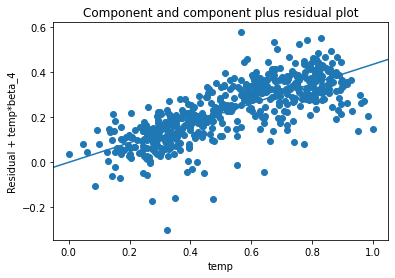

In [53]:
# Validating Linear Relationship
sm.graphics.plot_ccpr(lr_model14, 'temp')
plt.show()

The partial residual plot represents the relationship between the predictor and the dependent variable while taking into account all the other variables. As we can see in the above graph, the linearity is well respected

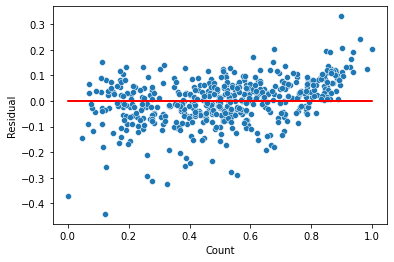

In [54]:
# Validating Homoscedasticity : The residuals have constant variance with respect to the dependent variable
y_train_pred = lr_model14.predict(X_train_sm)
sns.scatterplot(y_train,(y_train - y_train_pred))
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

As we can see in the above plot, Homoscedasticity is well respected since the variance of the residuals are almost constant.

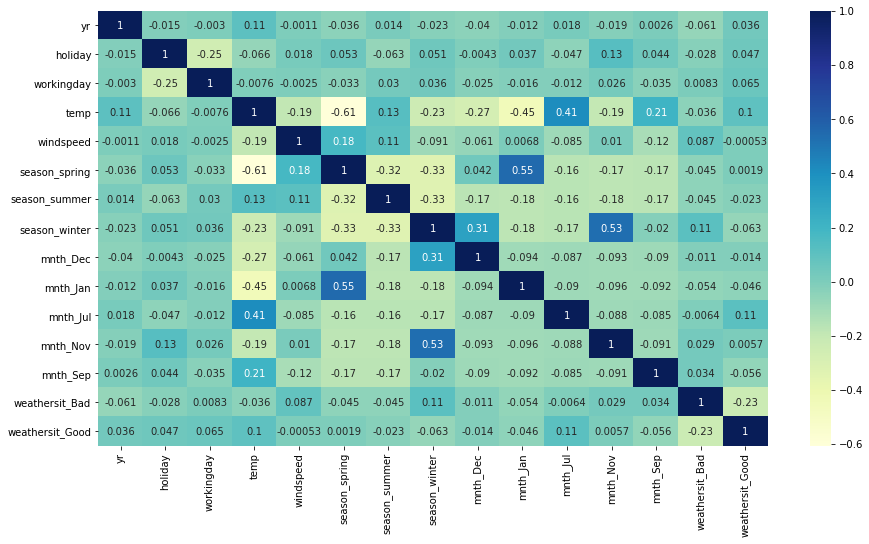

In [55]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),annot=True, cmap='YlGnBu')
plt.show()

All variables have less than 0.56 correlation with eachother. Checking the VIF now.

In [56]:
print(vif)

           Features   VIF
3              temp  6.59
4         windspeed  4.70
2        workingday  3.61
5     season_spring  3.12
7     season_winter  3.02
14  weathersit_Good  2.91
6     season_summer  2.27
0                yr  2.07
11         mnth_Nov  1.82
9          mnth_Jan  1.65
10         mnth_Jul  1.60
8          mnth_Dec  1.46
12         mnth_Sep  1.34
1           holiday  1.14
13   weathersit_Bad  1.12


Taking 10 as the maximum VIF permissible for this model, we decide on keeping these colmns based upon business assumptions

In [57]:
# Independence of residuals (absence of auto-correlation)
# Autocorrelation refers to the fact that observations’ errors are correlated
# To verify that the observations are not auto-correlated, we can use the Durbin-Watson test. 
# The test will output values between 0 and 4. The closer it is to 2, the less auto-correlation there is between the various variables
# (0–2: positive auto-correlation, 2–4: negative auto-correlation)

print('The Durbin-Watson value for Model No.14 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),4))

The Durbin-Watson value for Model No.14 is 2.0084


There is almost nil auto-correlation

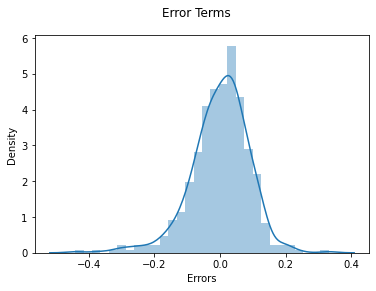

In [58]:
# Normality of Errors
y_train_pred = lr_model14.predict(X_train_sm)

# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')     
plt.show()

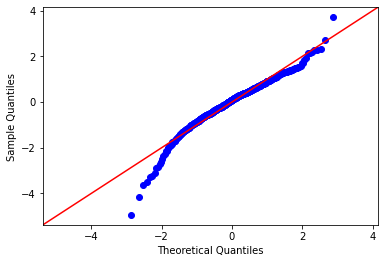

In [59]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

The error terms are normally distributed

## Making prediction using the final model

In [60]:
# Scaling the Test Dataset with the Scaler of the Training Set
cols = df_test.columns
df_test[cols] = scaler.transform(df_test[cols])

In [61]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [62]:
# Adding the constant column
X_test_m14 = sm.add_constant(X_test)

In [63]:
# Removing all the columns which has been removed from Model 14
X_test_m14 = X_test_m14.drop(['mnth_Mar','mnth_Jun','mnth_Oct','weekday_2','weekday_1',
                              'weekday_6','atemp','mnth_Aug','weekday_3','mnth_May',
                              'mnth_Feb','weekday_5','weekday_4','hum'], axis=1)

In [64]:
# Making prediction using Model 14
y_test_pred = lr_model14.predict(X_test_m14)

## Model Evaluation

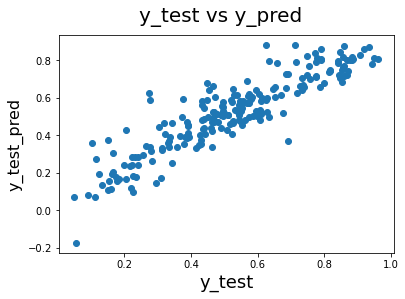

In [65]:
# Let's now plot the graph for actual versus predicted values

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)     
plt.show()

In [71]:
#putting the variables of final model and sorting them based on coefficient value
param = pd.DataFrame(lr_model14.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,16))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
4,temp,0.436214
1,yr,0.234151
0,const,0.181275
8,season_winter,0.089846
15,weathersit_Good,0.083300
13,mnth_Sep,0.067735
7,season_summer,0.033886
3,workingday,-0.022600
12,mnth_Nov,-0.041068


In [72]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_test_pred))

The R-Squared score of the model for the predicted values is 0.82
The Root Mean Squared Error of the model for the predicted values is 0.0935
The Mean Absolute Error of the model for the predicted values is 0.06955703467386057


In [73]:
# As asked in problem statement.
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8160235878128288

We can see that the equation of our best fitted line developed by Model 14 is:

cnt = 0.1812 + ( 0.2341 * yr - 0.1090 * holiday - 0.0226 * workingday + 0.4362 * temp - 0.1590 * windspeed - 0.0718 * season_spring + 0.0338 * season_summer + 0.0898 * season_winter - 0.0462 * December - 0.0502 * January - 0.0509 * July - 0.04106 * November + 0.0677 * September - 0.2106 * Bad Weather + 0.0833 * Good Weather)

Since the bookings increase on good weather days with hotter temperature, the company must increase their bike availibilty and promotions during the summer months to further increase their booking count.

An R-Squared value of 0.82 on the test data signifies that the model is a very good predictor and 82% of the variance is captured by the model.It can be further improved by using other regression techniques like Random Forest